<a href="https://colab.research.google.com/github/cemyigman/CV_VBE/blob/main/Optimization%5COptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Basic Optimization Solver Using Python**

<table >
    <tr align="right">
        <td>max</td>
        <td>z =</td>
        <td>3x</td>
        <td>+</td>
        <td>2y</td>
        <td></td>
        <td></td>
    </tr>    
    <tr align="right">
        <td>s.t.</td>
        <td></td>
        <td>2x</td>
        <td>+</td>
        <td>y</td>
        <td>&leq;</td>
        <td>100</td>
    </tr>
    <tr align="right">
        <td></td>
        <td></td>
        <td>x</td>
        <td>+</td>
        <td>y</td>
        <td> &leq; </td>
        <td>80</td>
    </tr>
    <tr align="right">
        <td></td>
        <td></td>
        <td>x</td>
        <td></td>
        <td></td>
        <td>&leq;</td>
        <td>40</td>
    </tr>
    <tr align="right">
        <td></td>
        <td></td>
        <td>x</td>
        <td></td>
        <td></td>
        <td>&geq;</td>
        <td>0</td>
    </tr>
    <tr align="right">
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>y</td>
        <td>&geq;</td>
        <td>0</td>
    </tr>  
</table>


**Installing ortools package for operation research function in Python**\
https://developers.google.com/optimization/install/python

In [ ]:
!pip install ortools

In [3]:
from ortools.linear_solver import pywraplp
from ortools.init import pywrapinit
import numpy as np
import matplotlib.pyplot as plt

In [5]:
solver = pywraplp.Solver.CreateSolver('GLOP')

https://google.github.io/or-tools/python/ortools/linear_solver/pywraplp.html \
CLP_LINEAR_PROGRAMMING or CLP \
CBC_MIXED_INTEGER_PROGRAMMING or CBC \
GLOP_LINEAR_PROGRAMMING or GLOP \
BOP_INTEGER_PROGRAMMING or BOP \
SAT_INTEGER_PROGRAMMING or SAT or CP_SAT \
SCIP_MIXED_INTEGER_PROGRAMMING or SCIP \
GUROBI_LINEAR_PROGRAMMING or GUROBI_LP \
GUROBI_MIXED_INTEGER_PROGRAMMING or GUROBI or GUROBI_MIP \
CPLEX_LINEAR_PROGRAMMING or CPLEX_LP \
CPLEX_MIXED_INTEGER_PROGRAMMING or CPLEX or CPLEX_MIP \
XPRESS_LINEAR_PROGRAMMING or XPRESS_LP \
XPRESS_MIXED_INTEGER_PROGRAMMING or XPRESS or XPRESS_MIP \
GLPK_LINEAR_PROGRAMMING or GLPK_LP \
GLPK_MIXED_INTEGER_PROGRAMMING or GLPK or GLPK_MIP \

In [6]:
x = solver.NumVar(0, solver.infinity(), 'x')
y = solver.NumVar(0, solver.infinity(), 'y')

In [ ]:
print('Number of Variables:', solver.NumVariables())

In [8]:
c0 = solver.Add(2 * x + 1 * y <= 100, 'ConstraintName0')
c1 = solver.Add(1 * x + 1 * y <= 80, 'ConstraintName1')
c2 = solver.Add(1 * x <= 40, 'ConstraintName2')
c3 = solver.Add(x >= 0, 'ConstraintName3')
c4 = solver.Add(y >= 0, 'ConstraintName4')

In [10]:
objective = solver.Objective()
objective.SetCoefficient(x, 3)
objective.SetCoefficient(y, 2)
objective.SetMaximization()

In [11]:
solver.Solve()
print('Solution:')
print('Objective Value: ', objective.Value())
print('x = ', x.solution_value())
print('y = ', y.solution_value())

Solution:
Objective Value:  180.0
x =  19.999999999999986
y =  60.00000000000003


**Feasible Region**

The orientation of the image in the final rendering is controlled by the origin and extent keyword arguments (and attributes on the resulting AxesImage instance) and the data limits of the axes.

The extent keyword arguments controls the bounding box in data coordinates that the image will fill specified as (left, right, bottom, top) in data coordinates, the origin keyword argument controls how the image fills that bounding box, and the orientation in the final rendered image is also affected by the axes limits.

In [ ]:
# plot the feasible region
d = np.linspace(0,100,300)
x,y = np.meshgrid(d,d)
plt.imshow( ( (y<=100-2*x) & (y<=80-x) & (x<=40)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 100, 2000)

# 2x + y <= 100
y1 = 100-2*x
# x + y <= 80
y2 = 80-x
# x <= 40
y3 = plt.axvline(x=40, ymin=0.00, ymax=1, label=r'$x\leq40$')

# Plot the objective functions for different z values
o1 = 30 - 3/2*x
o2 = 60 - 3/2*x
o3 = 90 - 3/2*x

# Find optimal solution 
cnd1 = np.argwhere(np.diff(np.sign(y1- y2))).flatten()

# Make plot
plt.plot(x, y1, label=r'$2x+y\leq100$')
plt.plot(x, y2, label=r'$x+y\leq80$')
#plt.axvline(40, label=r'$x\leq40$')
plt.plot(x, o1, '--', linewidth=1, label=r'60 = 3x+2y', color='#e50000')
plt.plot(x, o2, '--', linewidth=1, label=r'120 = 3x+2y', color='#e50000')
plt.plot(x, o3, '--', linewidth=1, label=r'180 = 3x+2y', color='#e50000')
plt.plot(x[cnd1], y1[cnd1], 'ro')
plt.xlim(0,100)
plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('x')
plt.ylabel('y')

#**Linear Programming Using Pyomo Package**
https://colab.research.google.com/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/01.02-Running-Pyomo-on-Google-Colab.ipynb#scrollTo=pJHU-Rpkglqq

In [ ]:
!pip install -q pyomo

In [74]:
!apt-get install -y -qq glpk-utils

In [60]:
from pyomo.environ import *


In [ ]:
# create a model
model = ConcreteModel()

# declare decision variables
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

# declare objective
model.profit = Objective(expr = 40*model.x + 30*model.y, sense=maximize)

# declare constraints
model.demand = Constraint(expr = model.x <= 40)
model.laborA = Constraint(expr = model.x + model.y <= 80)
model.laborB = Constraint(expr = 2*model.x + model.y <= 100)

model.pprint()

In [ ]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

In [ ]:
# display solution
print('\nProfit = ', model.profit())

print('\nDecision Variables')
print('x = ', model.x())
print('y = ', model.y())

print('\nConstraints')
print('Demand  = ', model.demand())
print('Labor A = ', model.laborA())
print('Labor B = ', model.laborB())

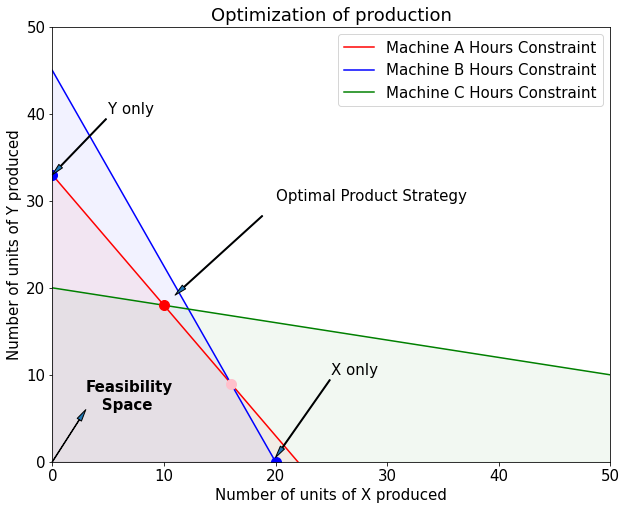

In [101]:
plt.figure(figsize = (10,8))
plt.rcParams["font.size"] = 15
plt.axis([0, 50, 0, 50])

#Hours constraint of machine A
x = np.array([0,50]); y = 33 - 1.5*x
plt.plot(x, y, "red", label = "Machine A Hours Constraint")
plt.fill_between([0, 22], [33,0], color = "red", alpha = 0.05)

#Hours constraint of machine B
x = np.array([0, 50]); y = 45 - 2.25*x
plt.plot(x, y, "blue", label = "Machine B Hours Constraint")
plt.fill_between([0, 20], [45,0], color = "blue", alpha = 0.05)

#Hours Constraint of Machine C
x = np.array([0, 50]); y = 20 - 0.2*x
plt.plot(x, y, "green", label = "Machine C Hours Constraint")
plt.fill_between([0, 100], [20,0], color = "green", alpha = 0.05)

#Indicate optimal product strategy
plt.plot(10,18, marker = "o", color = "red", markersize= 10)
plt.annotate("Optimal Product Strategy", xy = (10,18), xytext = (20,30),
            arrowprops = dict(shrink =.1, width = 1,headwidth = 5))

plt.plot(16,9, marker = "o", color = "pink", markersize= 10)
plt.plot(20, 0, marker = "o", color = "b",markersize = 10)
plt.annotate("X only", xy = (20,0.5), xytext= (25,10), arrowprops = dict(width = 1, headwidth = 5))

plt.plot(0,33,marker = "o", color = "blue", markersize = 10)
plt.annotate("Y only", xy = (0,33), xytext = (5,40), arrowprops = dict(width = 1,headwidth = 5))

#Indicate feasibility space
plt.text(3, 6, "Feasibility\n   Space", fontdict = {"weight":"bold"})
plt.annotate("", xy = (3,6), xytext = (0,0), arrowprops = dict( width = 0.5, headwidth = 5))

plt.xlabel("Number of units of X produced"); plt.ylabel("Number of units of Y produced")
plt.title("Optimization of production")

plt.legend()
plt.show()

#**Integer Programming**

<table >
    <tr align="right">
        <td>max</td>
        <td>z =</td>
        <td>x</td>
        <td>+</td>
        <td>10y</td>
        <td></td>
        <td></td>
    </tr>    
    <tr align="right">
        <td>s.t.</td>
        <td></td>
        <td>x</td>
        <td>+</td>
        <td>7y</td>
        <td>&leq;</td>
        <td>17.5</td>
    </tr>
    <tr align="right">
        <td></td>
        <td></td>
        <td>x</td>
        <td></td>
        <td></td>
        <td> &leq; </td>
        <td>3.5</td>
    </tr>
    <tr align="right">
        <td></td>
        <td></td>
        <td>x</td>
        <td></td>
        <td></td>
        <td>&geq;</td>
        <td>o</td>
    </tr>
    <tr align="right">
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>y</td>
        <td>&geq;</td>
        <td>o</td>
    </tr>
    <tr align="right">
        <td></td>
        <td></td>
        <td>x</td>
        <td></td>
        <td></td>
        <td></td>
        <td>integer</td>
    </tr>
    <tr align="right">
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>y</td>
        <td></td>
        <td>integer</td>
    </tr>      
</table>

**Knapsack Problem**\
\
Let’s pretend you’re going on a hike and you’re planning which objects you can take with you. Each object has a weight in pounds w_i and will give you u_i units of utility. You’d like to take all of them but your knapsack can only carry P pounds. Suppose you can either take an object or not. Your goal is to maximize your utility without exceeding the weight limit of your bag.\
A cvxpy problem has three parts:\
\
**Creating the variable:** We will represent our choice mathematically with a vector of 1’s and 0’s. A 1 will mean we’ve selected that object and a 0 will mean we’ve left it home. We construct a variable that can only take 1’s and 0’s with the cvxpy.Bool object.\
\
**Specifying the constraints:** We only need to make sure that the sum of our objects doesn’t exceed the weight limit P. We can compute the total weight of our objects with the dot product of the selection vector and the weights vector. Note that cvxpy overloads the * operator to perform matrix multiplication.\
\
**Formulating the objective function:** We want to find the selection that maximizes our utility. The utility of any given selection is the dot product of the selection vector and the utility vector.


In [ ]:
!pip install cvxpy

In [104]:
import cvxpy
import numpy as np

In [ ]:
# The data for the Knapsack problem
# P is total weight capacity of sack
# weights and utilities are also specified
P = 165
weights = np.array([23, 31, 29, 44, 53, 38, 63, 85, 89, 82])
utilities = np.array([92, 57, 49, 68, 60, 43, 67, 84, 87, 72])

# The variable we are solving for
selection = cvxpy.Bool(len(weights))

# The sum of the weights should be less than or equal to P
weight_constraint = weights * selection <= P

# Our total utility is the sum of the item utilities
total_utility = utilities * selection

# We tell cvxpy that we want to maximize total utility 
# subject to weight_constraint. All constraints in 
# cvxpy must be passed as a list
knapsack_problem = cvxpy.Problem(cvxpy.Maximize(total_utility), [weight_constraint])

# Solving the problem
knapsack_problem.solve(solver=cvxpy.GLPK_MI)